In [1]:
from paint import *

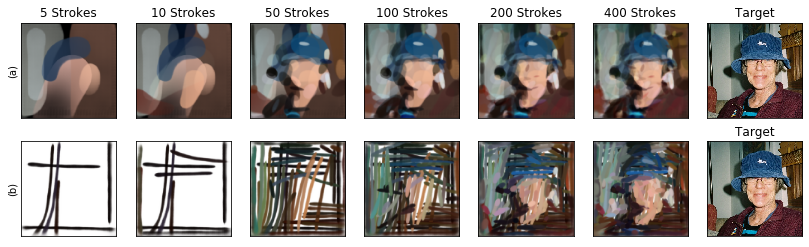

In [3]:
output_stroke_inds = [5, 10,50, 100, 200, 400]

actor_fns = ['pretrained_models/huang19/actor.pkl','pretrained_models/gan/actor.pkl']
renderer_fns = ['renderer_unconstrained.pkl', 'renderer_constrained.pkl']
white_canvas = [False, True]
labels = ['(a)','(b)']

fn = 'image/neisley/4.jpg'

target = cv2.imread(fn, cv2.IMREAD_COLOR)

all_canvas_progress = []
for i in range(len(actor_fns)):
    actor_fn = actor_fns[i]
    renderer_fn = renderer_fns[i]

    all_canvas_progress.append(paint(actor_fn=actor_fn, renderer_fn=renderer_fn, \
                                     max_step=int(output_stroke_inds[-1]/5)+1, img=fn, \
                                     div=1, discrete_colors=False, white_canvas=white_canvas[i])[2])
    
n_rows = len(all_canvas_progress)
n_cols = len(output_stroke_inds)

fig, ax = plt.subplots(n_rows, n_cols+1, figsize=(2*(n_cols+1), 2*n_rows))

for i in range(n_rows):
    for j in range(n_cols):
        if j==0: ax[i, j].set_ylabel(labels[i])
        ax[i, j].imshow(all_canvas_progress[i][output_stroke_inds[j]])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        if i == 0: ax[i, j].set_title(str(output_stroke_inds[j]) + ' Strokes')
    
    ax[i, n_cols].imshow(target[...,::-1])
    ax[i, n_cols].set_xticks([])
    ax[i, n_cols].set_yticks([])
    ax[i, n_cols].set_title('Target')